In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Remove unnecessary columns
data = data.drop(['dropout.semester'], axis=1)

# Verify the nature of the target variable
target_column = 'retention'
y = data[target_column]

# If 'retention' is not categorical, convert it
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convert to binary based on the median

# Use LabelEncoder if 'retention' is categorical
y = LabelEncoder().fit_transform(y)

# Separate the features
X = data.drop(target_column, axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Models to evaluate
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=1000, random_state=42)
}

# Training and evaluating models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n" + "-"*60 + "\n")

# Hyperparameter tuning using GridSearchCV for the best model
param_grid = {
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    'NeuralNetwork': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

best_model = None
best_score = 0

for model_name, params in param_grid.items():
    grid_search = GridSearchCV(models[model_name], params, cv=5, scoring='f1', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 Score: {grid_search.best_score_}")

    if grid_search.best_score_ > best_score:
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print("Best Model Performance on Test Set")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"Precision: {precision_score(y_test, y_pred_best)}")
print(f"Recall: {recall_score(y_test, y_pred_best)}")
print(f"F1 Score: {f1_score(y_test, y_pred_best)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Model: DecisionTree
Accuracy: 0.9078947368421053
Precision: 0.955191415313225
Recall: 0.9477697841726619
F1 Score: 0.9514661274014156
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.11      0.10       346
           1       0.96      0.95      0.95      6950

    accuracy                           0.91      7296
   macro avg       0.52      0.53      0.53      7296
weighted avg       0.91      0.91      0.91      7296

Confusion Matrix:
[[  37  309]
 [ 363 6587]]

------------------------------------------------------------

Model: NeuralNetwork
Accuracy: 0.9332510964912281
Precision: 0.9539261132181486
Recall: 0.9771223021582733
F1 Score: 0.9653848887625276
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.05      0.07       346
           1       0.95      0.98      0.97      6950

    accuracy                           0.93      7296
   macro avg       0.53      0.

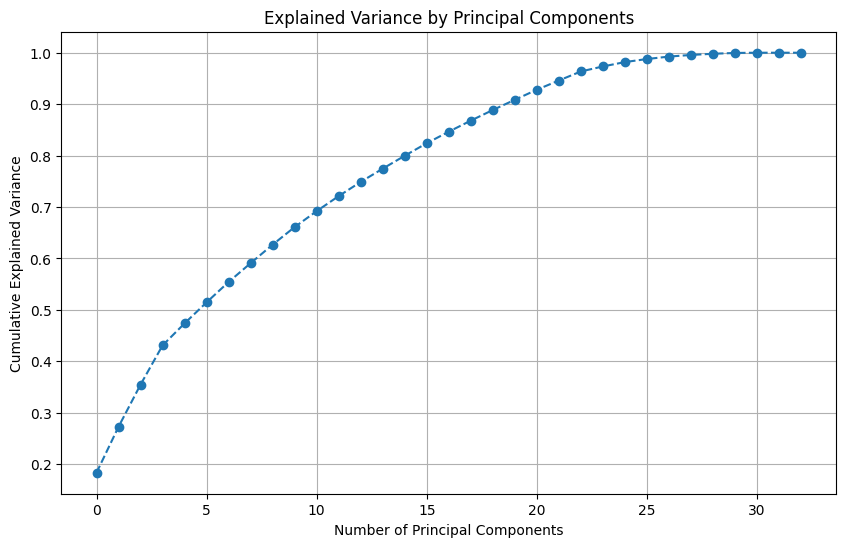

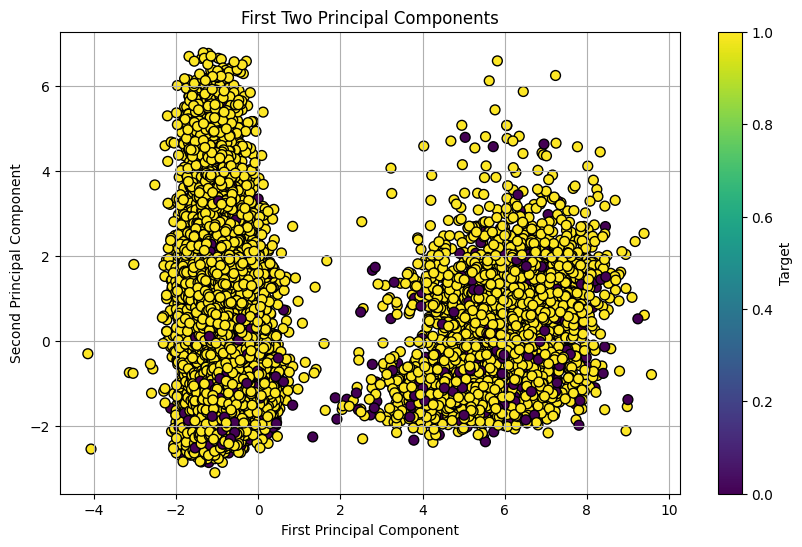

Model: DecisionTree
Accuracy: 0.9022752192982456
Precision: 0.9543931225411627
Recall: 0.9424460431654677
F1 Score: 0.9483819590241077
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.10      0.08       346
           1       0.95      0.94      0.95      6950

    accuracy                           0.90      7296
   macro avg       0.52      0.52      0.52      7296
weighted avg       0.91      0.90      0.91      7296

Confusion Matrix:
[[  33  313]
 [ 400 6550]]

------------------------------------------------------------

Model: NeuralNetwork
Accuracy: 0.9332510964912281
Precision: 0.9539261132181486
Recall: 0.9771223021582733
F1 Score: 0.9653848887625276
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.05      0.07       346
           1       0.95      0.98      0.97      6950

    accuracy                           0.93      7296
   macro avg       0.53      0

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Remove unnecessary columns
data = data.drop(['dropout.semester'], axis=1)

# Verify the nature of the target variable
target_column = 'retention'
y = data[target_column]

# If 'retention' is not categorical, convert it
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convert to binary based on the median

# Use LabelEncoder if 'retention' is categorical
y = LabelEncoder().fit_transform(y)

# Separate the features
X = data.drop(target_column, axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Target')
plt.grid()
plt.show()

# Apply PCA with n_components to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Models to evaluate
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=1000, random_state=42)
}

# Training and evaluating models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n" + "-"*60 + "\n")

# Hyperparameter tuning using GridSearchCV for the best model
param_grid = {
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    'NeuralNetwork': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

best_model = None
best_score = 0

for model_name, params in param_grid.items():
    grid_search = GridSearchCV(models[model_name], params, cv=5, scoring='f1', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 Score: {grid_search.best_score_}")

    if grid_search.best_score_ > best_score:
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print("Best Model Performance on Test Set")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"Precision: {precision_score(y_test, y_pred_best)}")
print(f"Recall: {recall_score(y_test, y_pred_best)}")
print(f"F1 Score: {f1_score(y_test, y_pred_best)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


In [3]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train and evaluate models on the resampled dataset
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n" + "-"*60 + "\n")


Model: DecisionTree
Accuracy: 0.8209978070175439
Precision: 0.9542820347714102
Recall: 0.8529496402877698
F1 Score: 0.9007749582130375
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.18      0.09       346
           1       0.95      0.85      0.90      6950

    accuracy                           0.82      7296
   macro avg       0.51      0.52      0.49      7296
weighted avg       0.91      0.82      0.86      7296

Confusion Matrix:
[[  62  284]
 [1022 5928]]

------------------------------------------------------------

Model: NeuralNetwork
Accuracy: 0.8921326754385965
Precision: 0.9548339483394834
Recall: 0.9307913669064748
F1 Score: 0.9426593806921676
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.12      0.09       346
           1       0.95      0.93      0.94      6950

    accuracy                           0.89      7296
   macro avg       0.52      0

In [4]:
# Adjust class weights in GridSearchCV
param_grid = {
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', None, {0: 1, 1: 10}, {0: 1, 1: 20}]
    },
    'NeuralNetwork': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

# Example for DecisionTree
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid['DecisionTree'], cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters for DecisionTree: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for DecisionTree: {'class_weight': {0: 1, 1: 10}, 'max_depth': 3, 'min_samples_split': 2}
Best F1 Score: 0.9755906411623378


In [5]:
# Train DecisionTreeClassifier with optimized parameters
best_decision_tree = DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=3, min_samples_split=2)
best_decision_tree.fit(X_train, y_train)

# Evaluate on test set
y_pred_best_decision_tree = best_decision_tree.predict(X_test)

# Print evaluation metrics
print("Best Decision Tree Performance on Test Set")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_decision_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_best_decision_tree)}")
print(f"Recall: {recall_score(y_test, y_pred_best_decision_tree)}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_decision_tree)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_decision_tree))


Best Decision Tree Performance on Test Set
Accuracy: 0.9521655701754386
Precision: 0.9526813880126183
Recall: 0.9994244604316547
F1 Score: 0.9754932940102521
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.00      0.01       346
           1       0.95      1.00      0.98      6950

    accuracy                           0.95      7296
   macro avg       0.58      0.50      0.49      7296
weighted avg       0.92      0.95      0.93      7296

Confusion Matrix:
[[   1  345]
 [   4 6946]]


In [14]:

# Load the new data from the same file
new_data = pd.read_csv('./data/label_encoded_scaled_data.csv')

new_data = new_data.drop(['dropout.semester'], axis=1)

# Remove the 'retention' column from the new data
X_new = new_data.drop('retention', axis=1)

# Scale the features using the same scaler used during training
X_new_scaled = scaler.transform(X_new)  # Assuming 'scaler' is the scaler used during training

# Apply PCA transformation to the scaled features
X_new_pca = pca.transform(X_new_scaled)  # Assuming 'pca' is the PCA model fitted during training

# Predict retention status using the pre-trained model
predicted_retention_status = best_model.predict(X_new_pca)  # Assuming 'best_model' is the trained classifier

# Interpret the predictions
# Assuming 1 indicates retention and 0 indicates dropout
retained_students = new_data[predicted_retention_status == 1]
dropout_students = new_data[predicted_retention_status == 0]

# Calculate the percentage of retained and dropout students
percentage_retained = (len(retained_students) / len(new_data)) * 100
percentage_dropout = (len(dropout_students) / len(new_data)) * 100

print(f"Percentage of Retained Students: {percentage_retained:.2f}%")
print(f"Percentage of Dropout Students: {percentage_dropout:.2f}%")


Percentage of Retained Students: 99.97%
Percentage of Dropout Students: 0.03%


[0.01895983 0.04219276 0.00754584 ... 0.03821516 0.04675896 0.09060157]


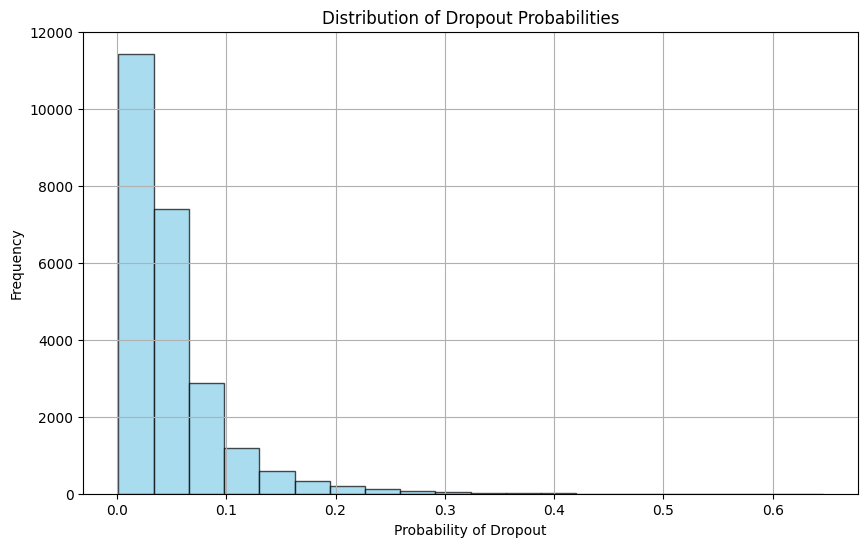

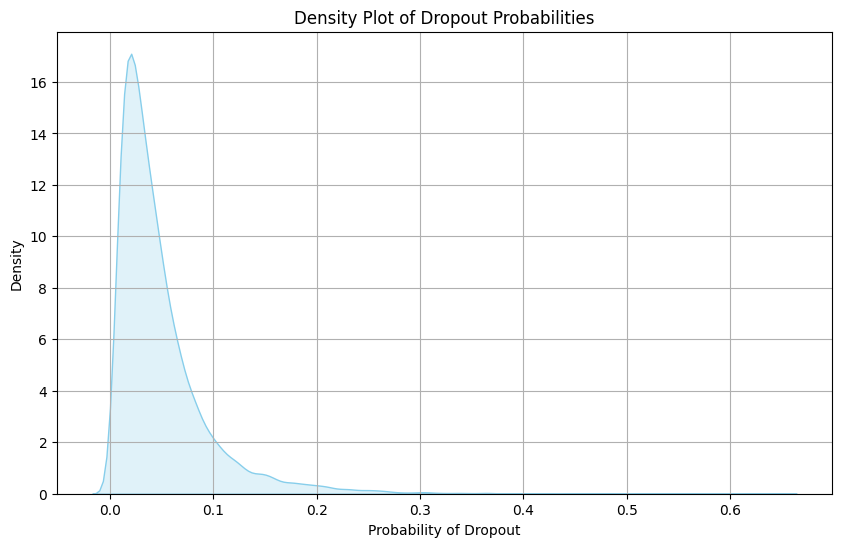

In [32]:
# Predict probability of dropout using the pre-trained model
dropout_probabilities = best_model.predict_proba(X_new_pca)[:,0]  # Probability of dropout (class 0)


# Assuming dropout_probabilities is an array containing the probability of dropout for each student
# You can print or analyze these probabilities to understand the likelihood of dropout for each student
print(dropout_probabilities)

import matplotlib.pyplot as plt

# Plot a histogram of dropout probabilities
plt.figure(figsize=(10, 6))
plt.hist(dropout_probabilities, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Dropout Probabilities')
plt.xlabel('Probability of Dropout')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import seaborn as sns

# Plot a density plot of dropout probabilities
plt.figure(figsize=(10, 6))
sns.kdeplot(dropout_probabilities, color='skyblue', fill=True)
plt.title('Density Plot of Dropout Probabilities')
plt.xlabel('Probability of Dropout')
plt.ylabel('Density')
plt.grid(True)
plt.show()


The dropout probability for student 332 is: 0.10143053608345731


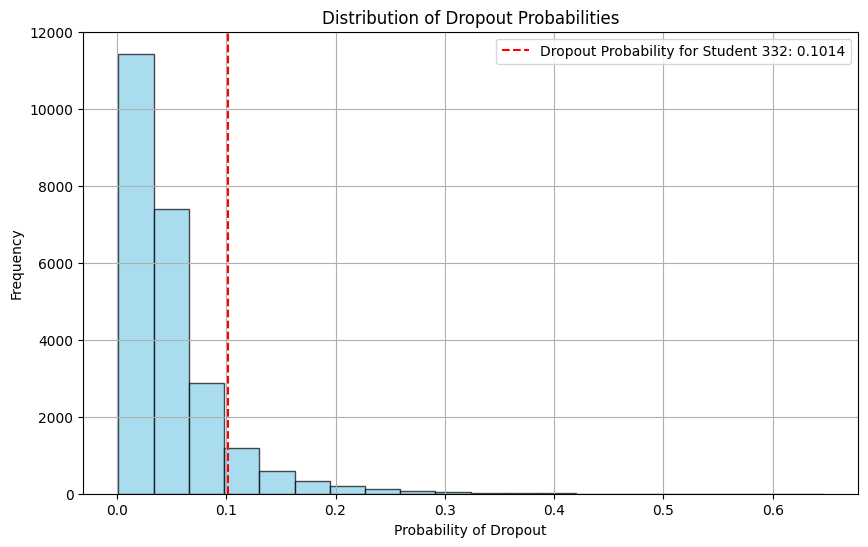

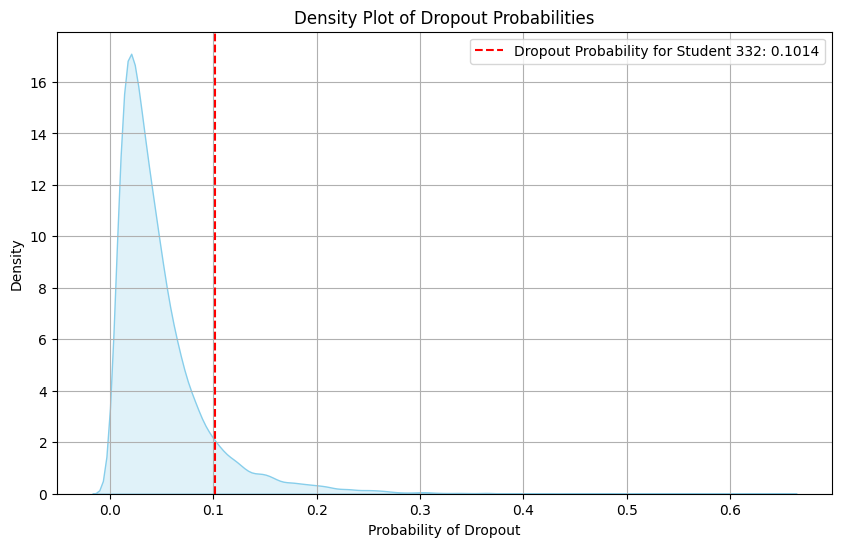

The dropout probability for student 332 is: 0.18637599488109446


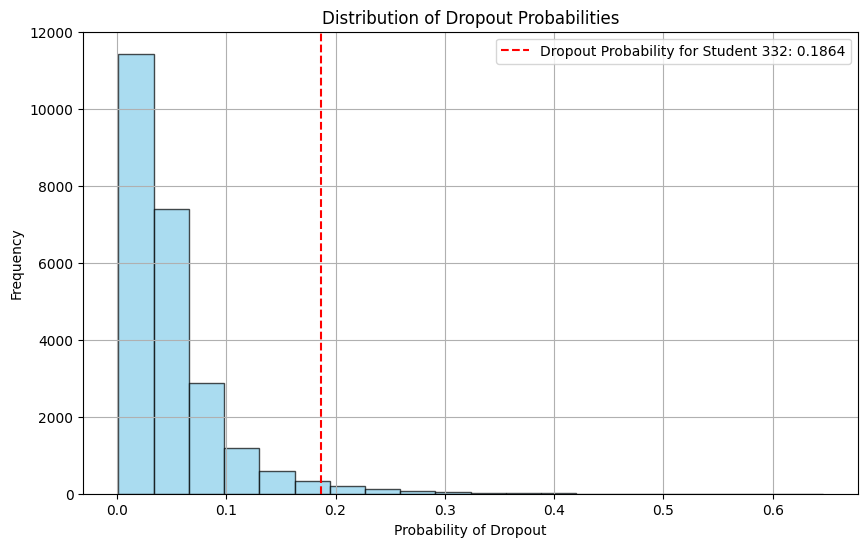

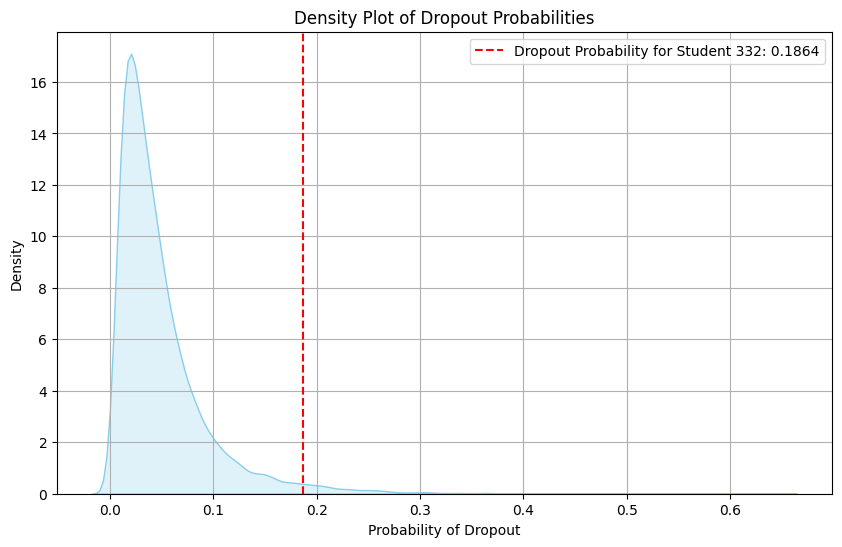

The dropout probability for student 332 is: 0.01338936952737968


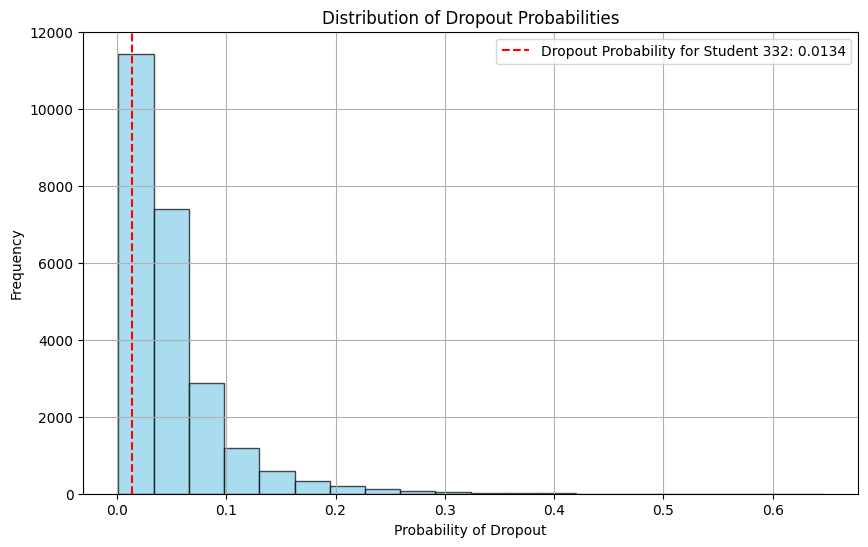

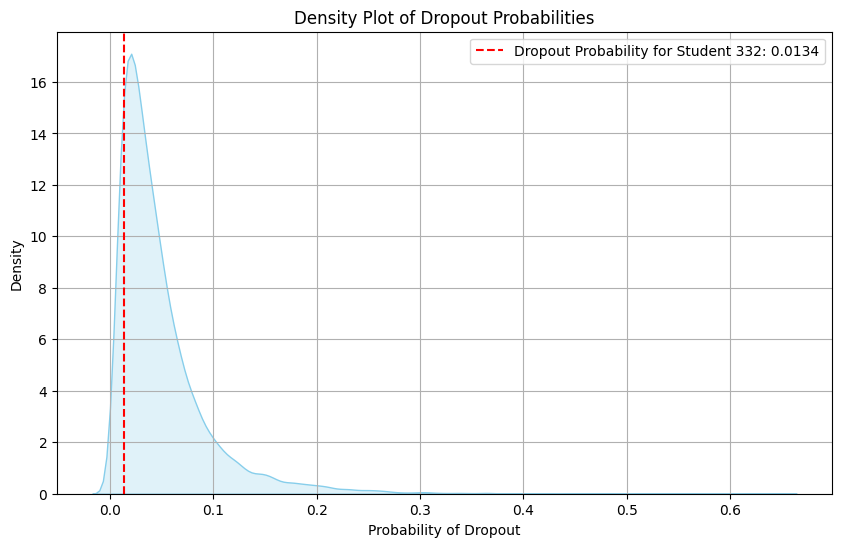

The dropout probability for student 332 is: 0.04474237932495351


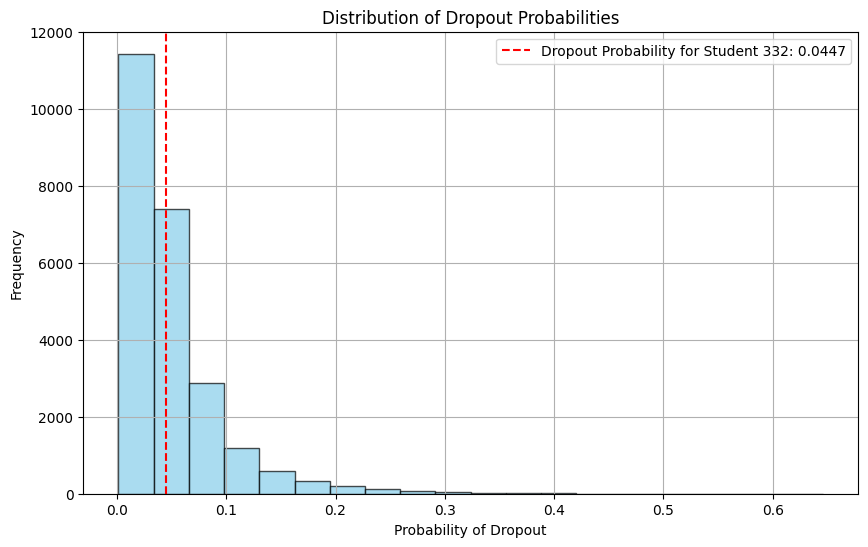

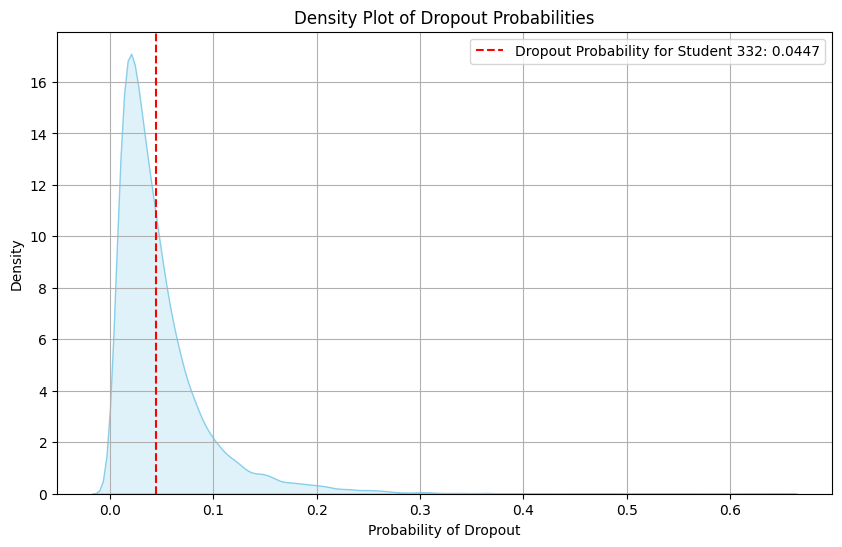

The dropout probability for student 332 is: 0.009939337987870722


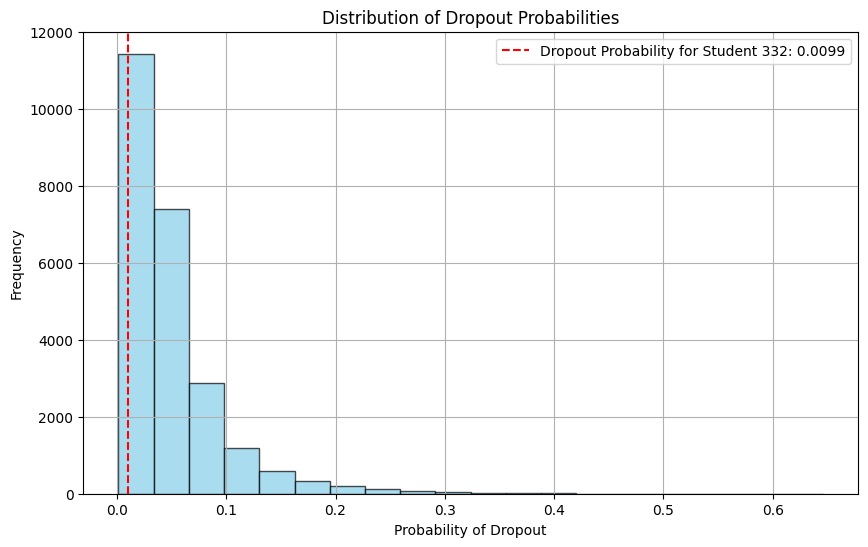

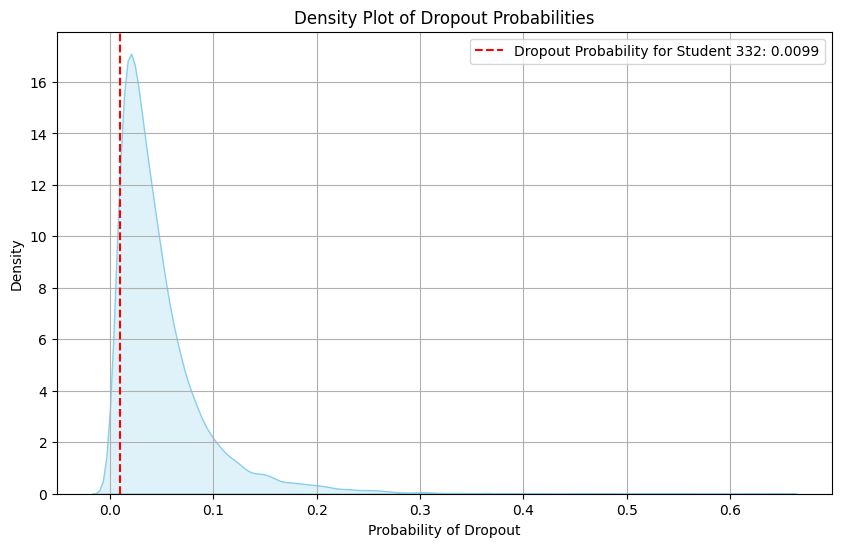

The dropout probability for student 332 is: 0.013117208957710735


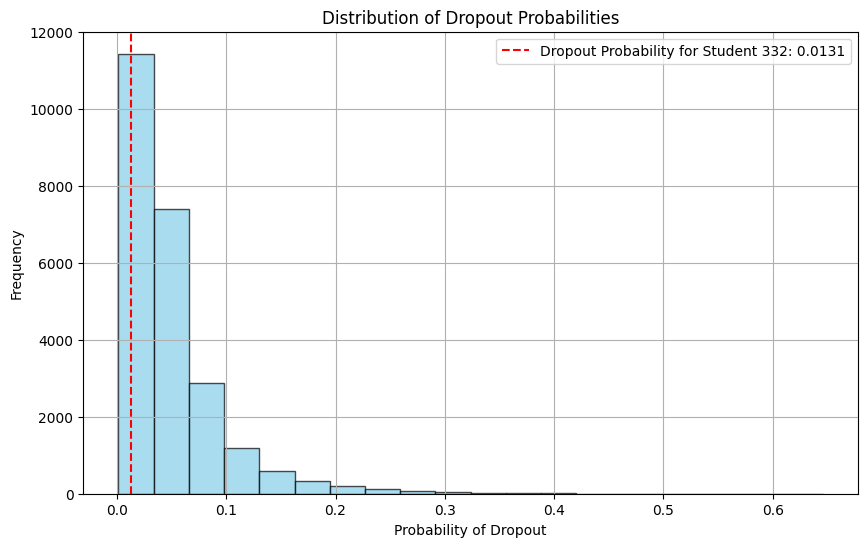

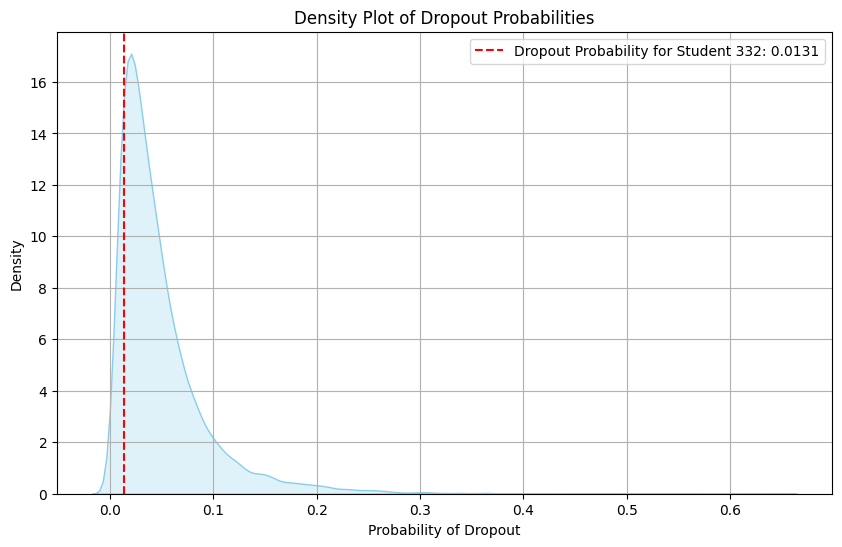

The dropout probability for student 332 is: 0.01946322780732579


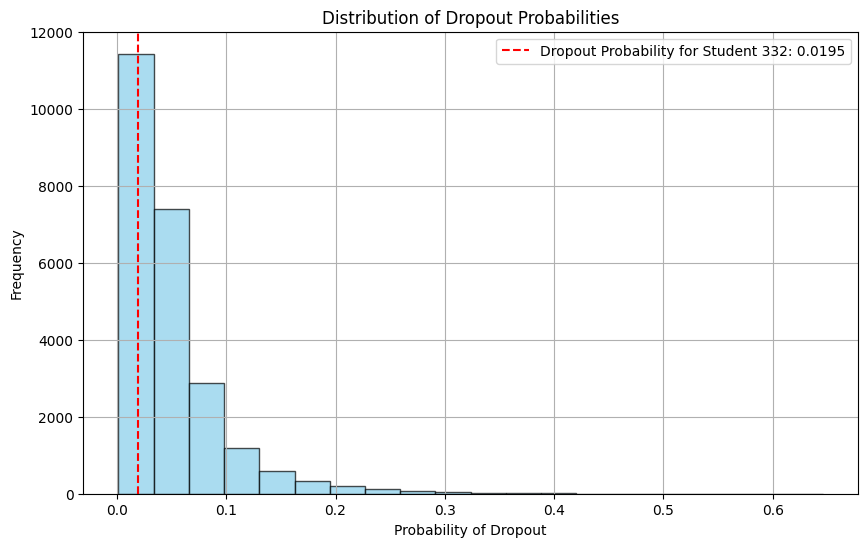

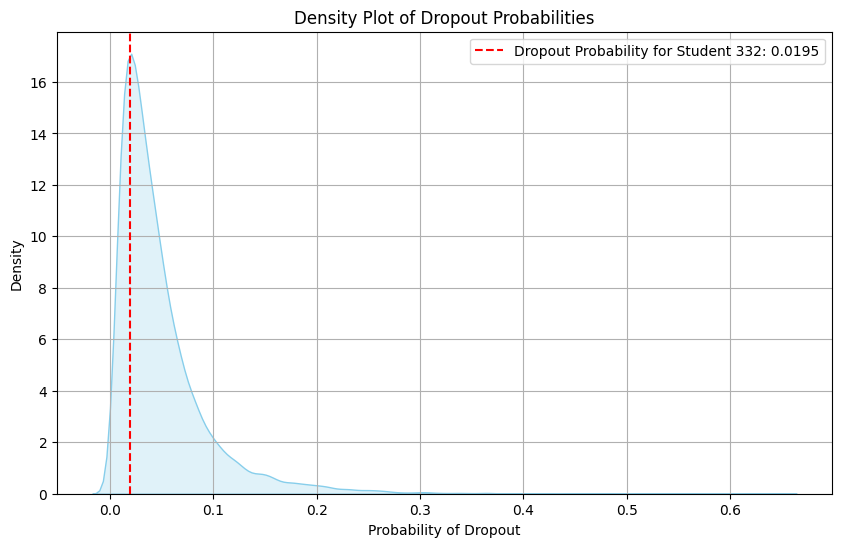

The dropout probability for student 332 is: 0.022988321544177515


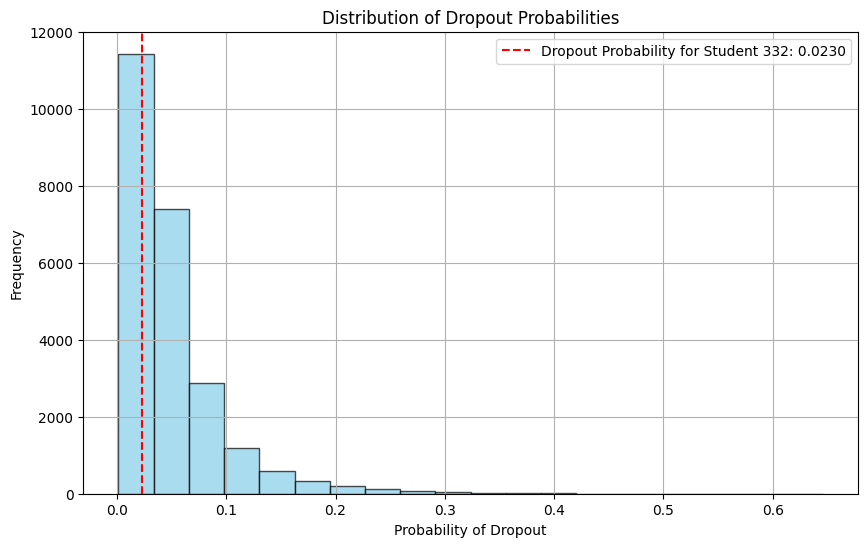

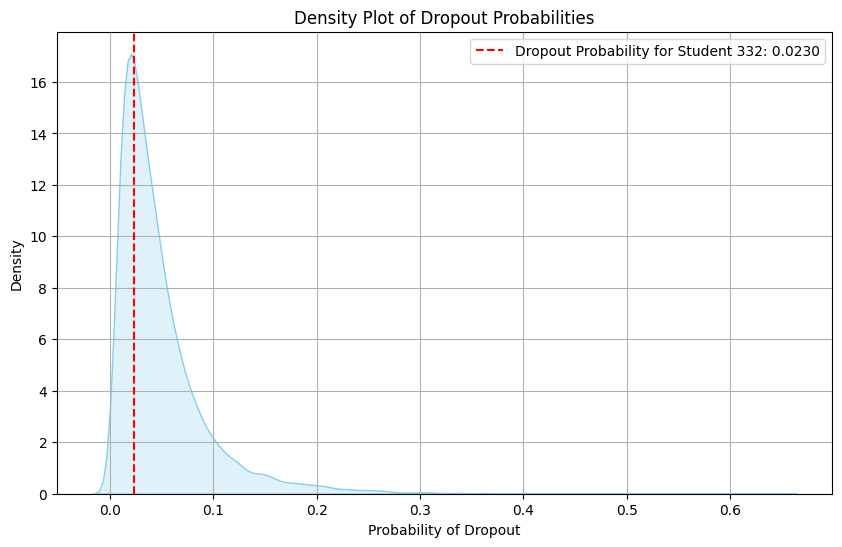

The dropout probability for student 332 is: 0.029045687127220665


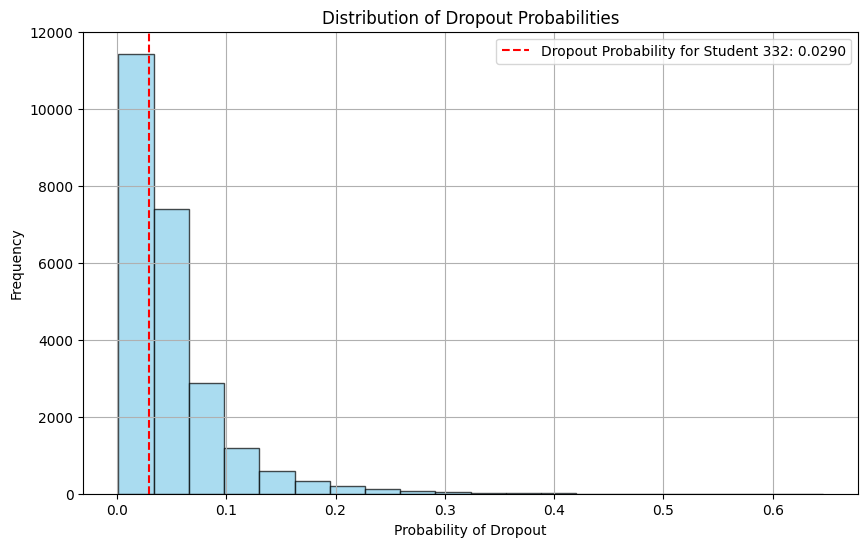

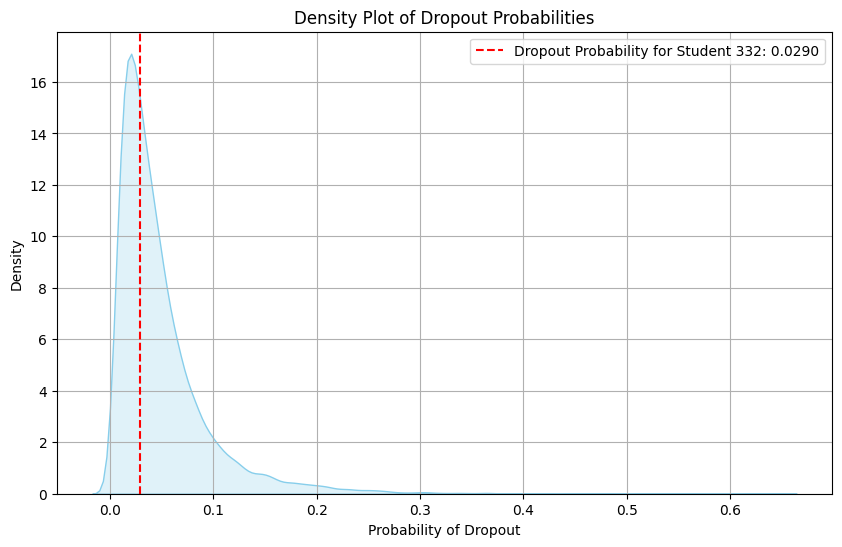

The dropout probability for student 332 is: 0.014429059507307551


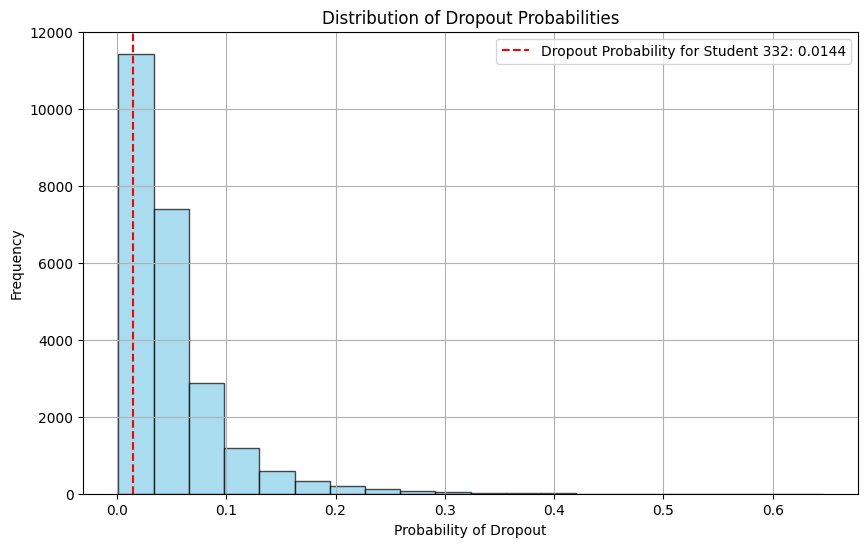

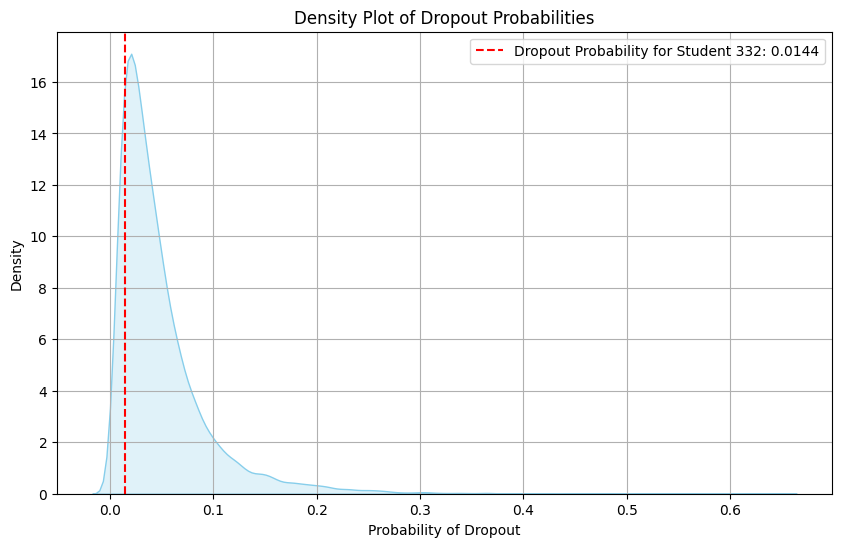

In [44]:
# Retrieve the dropout probability for the student at index 


for i in range(300, 310):
    dropout_probability_student_332 = dropout_probabilities[i]  # Assuming the index of student 332 is 332

    print(f"The dropout probability for student 332 is: {dropout_probability_student_332}")

    # Plot a histogram of dropout probabilities
    plt.figure(figsize=(10, 6))
    plt.hist(dropout_probabilities, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(x=dropout_probability_student_332, color='red', linestyle='--', label=f'Dropout Probability for Student 332: {dropout_probability_student_332:.4f}')
    plt.title('Distribution of Dropout Probabilities')
    plt.xlabel('Probability of Dropout')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot a density plot of dropout probabilities
    plt.figure(figsize=(10, 6))
    sns.kdeplot(dropout_probabilities, color='skyblue', fill=True)
    plt.axvline(x=dropout_probability_student_332, color='red', linestyle='--', label=f'Dropout Probability for Student 332: {dropout_probability_student_332:.4f}')
    plt.title('Density Plot of Dropout Probabilities')
    plt.xlabel('Probability of Dropout')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
